# Game of Life


The [Game of Life](http://en.wikipedia.org/wiki/Conway's_Game_of_Life) (GoF) is a cellular automaton devised by the British mathematician John Horton Conway in 1970. The game is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves, or, for advanced players, by creating patterns with particular properties.

The universe of the Game of Life is an infinite two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, live or dead. Every cell interacts with its eight neighbours, which are the cells that are directly horizontally, vertically, or diagonally adjacent. At each step in time, the following transitions occur:

* Any live cell with fewer than two live neighbours dies, as if by underpopulation.
* Any live cell with more than three live neighbours dies, as if by overcrowding.
* Any live cell with two or three live neighbours lives, unchanged, to the next generation.
* Any dead cell with exactly three live neighbours becomes a live cell.

The initial pattern (generation 0) constitutes the "seed" of the system.
Time is considered discrete, and each time step (sometimes called a tick), the previous rules are applied simultaneously to every cell in the grid; "births" and "deaths" are immediate.
Each generation is a pure function of the previous generation alone.


## Assignments

* Begin by implementing the GoF's rules and create few examples with basic seeds in small dimensions. Hint: create `.gif` animations from sequences of still `.png` images
* Implement examples of the three categories of patterns *still lifes*, *oscillators* and *spaceships* (check the [wiki link](http://en.wikipedia.org/wiki/Conway's_Game_of_Life))
* Analyse the evolutions of these patterns in terms of frequency (the number of cycles required to return to the original configuration, if any), occupancy (how many alive cells there are at every step of the game), replication or heat (the average number of cells that change state at each generation), speed (if applicable), etc.
* Increase the size of the GoF's world and play with more advanced and complex patterns

In [32]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.animation as animation
from PIL import Image
from matplotlib import colors as c
import math 
from matplotlib import pylab
from pylab import *
import cv2
import glob
import os
import seaborn as sns

## Create Board
'create_grid' function is creating the grid. Function assummes an N*N grid of points. Each point is either alive or dead, represented by integer values of 1 and 0, respectively and T The maximum number of generations

In [33]:
#Set up Conway's Game of Life
# T The maximum number of generations

def create_grid(N, T):
    grid = np.zeros(N*N).reshape(N,N)
    return grid

'initial pattern' function taking the grid, initial pattern and size of the game is an input. It is putting the initial pattern at the center of the grid and giving the the new grid at the output.

In [34]:
## Function to place the starting pattern 
def initial_patern(grid, pattern, N):

    #Dimension of the pattern
    row = np.size(pattern,axis=0)
    col = np.size(pattern,axis=1)
    
    #Place the pattern in the center of the grid
    for i in range (0, row):
        for j in range(0, col):
            grid[math.ceil(N/2)-math.floor(row/2) + i, math.ceil(N/2)-math.floor(col/2) + j] = pattern[i, j]

    
    return grid

## Patterns

In this section we gived examples of the patterns.  Common pattern types include: still lifes, which do not change from one generation to the next; oscillators, which return to their initial state after a finite number of generations; and spaceships, which translate themselves across the grid.

In [135]:
## PATTERNS

# Still lifes
block=np.array([[0, 0, 0, 0],
                [0, 1, 1, 0],
                [0, 1, 1, 0],
                [0, 0, 0, 0]])

bee_hive=np.array([[0, 0, 0, 0, 0, 0],
                   [0, 0, 1, 1, 0, 0],
                   [0, 1, 0, 0, 1, 0],
                   [0, 0, 1, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0]])

boat=np.array([[1, 1, 0], 
               [1, 0, 1], 
               [0, 1, 0]])

tub=np.array([[0, 1, 0], 
              [1, 0, 1], 
              [0, 1, 0]])

#------------------------------------------------------------------------

#Oscillators

blinker=np.array([[1,1,1]])

beacon=np.array([[1, 1, 0, 0],
                 [1, 1, 0, 0],
                 [0, 0, 1, 1],
                 [0, 0, 1, 1]])

toad=np.array([[0, 0, 0, 0, 0, 0],
               [0, 0, 1, 1, 1, 0],
               [0, 1, 1, 1, 0, 0],
               [0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0]])

pulsar=np.array([[0,0,1,1,1,0,0,0,1,1,1,0,0],
                 [0,0,0,0,0,0,0,0,0,0,0,0,0],
                 [1,0,0,0,0,1,0,1,0,0,0,0,1],
                 [1,0,0,0,0,1,0,1,0,0,0,0,1],
                 [1,0,0,0,0,1,0,1,0,0,0,0,1],
                 [0,0,1,1,1,0,0,0,1,1,1,0,0],
                 [0,0,0,0,0,0,0,0,0,0,0,0,0],
                 [0,0,1,1,1,0,0,0,1,1,1,0,0],
                 [1,0,0,0,0,1,0,1,0,0,0,0,1],
                 [1,0,0,0,0,1,0,1,0,0,0,0,1],
                 [1,0,0,0,0,1,0,1,0,0,0,0,1],
                 [0,0,0,0,0,0,0,0,0,0,0,0,0],
                 [0,0,1,1,1,0,0,0,1,1,1,0,0]])

pentadecathlon=np.array([[1, 1, 1, 1, 1, 1, 1, 1],
                         [1, 0, 1, 1, 1, 1, 0, 1],
                         [1, 1, 1, 1, 1, 1, 1, 1]])

#------------------------------------------------------------------------

#Spaceships

glider=np.array([[0, 1, 0, 0, 1],
                 [0, 0, 1, 0, 0],
                 [1, 0, 1, 0, 0],
                 [0, 1, 1, 0, 0],
                 [0, 0, 0, 0, 0]])

light_weight_spaceship=np.array([[0, 1, 0, 0, 1],
                                 [1, 0, 0, 0, 0],
                                 [1, 0, 0, 0, 1],
                                 [1, 1, 1, 1, 0]])

middle_weight_spaceship=np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                                  [0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
                                  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
                                  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


heavy_weight_spaceship=np.array([[0, 0, 0, 1, 1, 0, 0],
                                 [0, 1, 0, 0, 0, 0, 1],
                                 [1, 0, 0, 0, 0, 0, 0],
                                 [1, 0, 0, 0, 0, 0, 1],
                                 [1, 1, 1, 1, 1, 1, 0]])

#------------------------------------------------------------------------

# Other Patterns

diehard=np.array([[0, 0, 0, 0, 0, 0, 1, 0],
                  [1, 1, 0, 0, 0, 0, 0, 0],
                  [0, 1, 0, 0, 0, 1, 1, 1]])


r_pentomino=np.array([[0, 1, 1], 
                      [1, 1, 0], 
                      [0, 1, 0]])      



acorn=np.array([[0, 1, 0, 0, 0, 0, 0], 
                [0, 0, 0, 1, 0, 0, 0], 
                [1, 1, 0, 0, 1, 1, 1]])



block_switch_engine=np.array([[0, 0, 0, 0, 0, 0, 1, 0],
                              [0, 0, 0, 0, 1, 0, 1, 1],
                              [0, 0, 0, 0, 1, 0, 1, 0],
                              [0, 0, 0, 0, 1, 0, 0, 0],
                              [0, 0, 1, 0, 0, 0, 0, 0],
                              [1, 0, 1, 0, 0, 0, 0, 0]])

infinite=np.array([[1, 1, 1, 0, 1],
                   [1, 0, 0, 0, 0],
                   [0, 0, 0, 1, 1],
                   [0, 1, 1, 0, 1],
                   [1, 0, 1, 0, 1]])

##combination pattern

combi=np.array([[0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
                [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
                [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1],
                [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1],
                [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
                [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]])


combination2=np.array([[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
                       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
                       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
                       [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
                       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
                       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]])

glider_gun=np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                     [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                     [0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                     [0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

## How to Play?

Before starting the game we need to count alive cells. Because of this reasepn we wrote 'live_neighbours' function is counting the live neighbors around a specific cell point.

In [36]:
## Count the number of live neighbours

def live_neighbours(i, j, grid):
#Count the number of live neighbours around point (i, j)
    s = 0 # The total number of live neighbours.
    # Loop over all the neighbours.
    for x in [i-1, i, i+1]:
        for y in [j-1, j, j+1]:
            if(x == i and y == j):
                continue # Skip the current point itself - we only want to count the neighbours!
            if(x != N and y != N):
                s += grid[x][y]
            # The remaining branches handle the case where the neighbour is off the end of the grid.
            elif(x == N and y != N):
                s += grid[0][y]
            elif(x != N and y == N):
                s += grid[x][0]
            else:
                s += grid[0][0]
    return s


'conway_rule' is applying the 4 rules of the game of life which is
* Any live cell with fewer than two live neighbours dies, as if by underpopulation.
* Any live cell with more than three live neighbours dies, as if by overcrowding.
* Any live cell with two or three live neighbours lives, unchanged, to the next generation.
* Any dead cell with exactly three live neighbours becomes a live cell.

It is taking the grid size, grid and the new grid as an input. Then it is updating the new grid with respect to game rules and giving the final grid as an output.


In [37]:
#applying the 4 rules of the game of life

def conway_rule(N, grid, new_grid):

    # Loop over each cell of the grid and apply Conway's rules.
    for i in range(N):
        for j in range(N):
            live = live_neighbours(i, j, grid)
            if(grid[i][j] == 1 and live < 2):
                new_grid[i][j] = 0 # rule N°1, a cell dies if there are less than 2 neightbours
            elif(grid[i][j] == 1 and (live == 2 or live == 3)):
                new_grid[i][j] = 1 # rule N°3, a cell remains alive if there are 2 or 3 neightbours
            elif(grid[i][j] == 1 and live > 3):
                new_grid[i][j] = 0 # rule N°2, a cell dies if there are more than 3 neightbours
            elif(grid[i][j] == 0 and live == 3):
                new_grid[i][j] = 1 # rule N°4, a dead cell lives if there are 3 neightbours
    
    return new_grid

This is for analysis part. We will explain it later.

In [38]:
#function to check for the total alive and dead cells in each generation
def occupancy_check(grid,t):
    alive=0 # N° of cells that are alive
    dead=0  # N° of cells that are dead
    for i in range(N):
        for j in range(N):
            if(grid[i][j] == 1):
                alive+=1
            else:
                dead+=1
                
    print("the number of alive cells in the generation",t, "is :" , alive)
    #not really asked but just to verify that is correct
    #print("the number of dead cells in the generation",t, "is :" , dead)

'Game_Of_Life' function is one of the main function at the game which is starting the game using previous functions. 
It is generating .png files at every iteration of the game. 

In [39]:
def Game_Of_Life(N, T, grid):
#Play Conway's Game of Life.
# Write the initial configuration to file.
    
    pylab.pcolormesh(grid[::-1])
    pylab.savefig("generation0.png", dpi=100)
    grid_list=grid.copy()
    new_grid = grid.copy()
    t = 1 # Current time level
    occupancy_check(grid,0)
    count = np.zeros(T)
    
    while t <= T: # Evolve!
        print ("\nAt time level %d" % t)
        
        #for OCCUPANCY
        for i in range(N):
            for j in range(N):
                if (grid[i][j] == 1):
                    count[t-1] += 1
        #execute the conway rule
        grid2 = conway_rule(N, grid, new_grid)
        grid_list=np.add(grid_list, grid2) # adding the grid of gen t and t+1 for the Heat analysis
        grid = grid2.copy()#update the grid with the new grid
        occupancy_check(grid,t)
        pylab.pcolormesh(grid2[::-1])
        if (t<10):
            if os.path.exists("generation0%d.png" % t):
                os.remove("generation0%d.png" % t)
            pylab.savefig("generation0%d.png" % t, dpi=100)
        else:
            if os.path.exists("generation%d.png" % t):
                os.remove("generation%d.png" % t)
            pylab.savefig("generation%d.png" % t, dpi=100)

        # The new configuration becomes the old configuration for the next generation.
        grid = grid2.copy()

         # Move on to the next time level(next generation)
        t += 1
   
    return count,grid_list

## Let's Play

This is the main part of the game. It is calling the previous functions to create the game.

* First, create an empty board, you can select your board size by changing the N.
* Second, choose your initial pattern. It can be random or another patterns which is given in the pattern section.
* Third, place your initial pattern at the middle of the board.
* Finally, let the game start.


the number of alive cells in the generation 0 is : 11

At time level 1
the number of alive cells in the generation 1 is : 15

At time level 2
the number of alive cells in the generation 2 is : 11

At time level 3
the number of alive cells in the generation 3 is : 15

At time level 4
the number of alive cells in the generation 4 is : 11

At time level 5
the number of alive cells in the generation 5 is : 15

At time level 6
the number of alive cells in the generation 6 is : 11

At time level 7
the number of alive cells in the generation 7 is : 15

At time level 8
the number of alive cells in the generation 8 is : 11

At time level 9
the number of alive cells in the generation 9 is : 15

At time level 10
the number of alive cells in the generation 10 is : 11

At time level 11
the number of alive cells in the generation 11 is : 15

At time level 12
the number of alive cells in the generation 12 is : 11

At time level 13
the number of alive cells in the generation 13 is : 15

At time level 

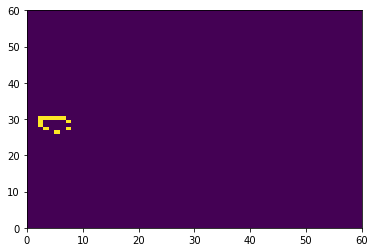

In [40]:
#Start the game of life
## MAIN

N = 60  # Size of the game
T = 50  # Number of the iterations

grid = create_grid(N, T) #First create an empty board
pattern = middle_weight_spaceship #Second, Select your initial pattern

int_grid = initial_patern(grid, pattern, N) #place your initial pattern at the middle of the board.

cell_alive,heat_grid = Game_Of_Life(N,T, int_grid)

This part of the code it is turning .png files to a single GIF file

In [41]:
# png to GIF file
from PIL import Image
# Create the frames
frames = []
imgs = glob.glob("*.png")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
 
#save into a GIF file that loops forever
frames[0].save('png_to_gif2.gif', format='GIF',
               append_images=frames[0:],
               save_all=True,
               duration=300, loop=0)

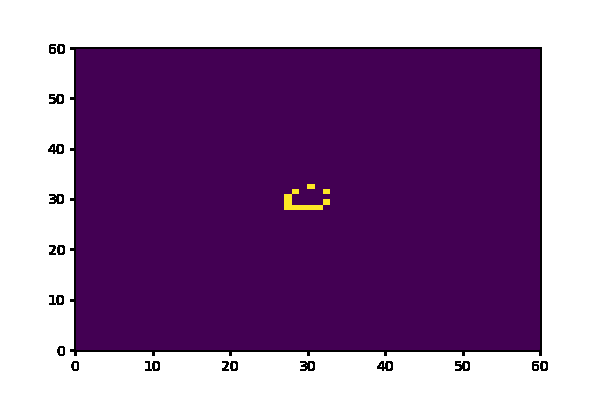

In [42]:
#display the png
from IPython.display import Image

Image("png_to_gif2.gif")

# Analysis

In this part we are doing analysis of the project.
1. Occupancy
2. Frequency
3. Replication
4. Speed

## Occupancy 

Occupancy is how many alive cells there are at every step of the game

Text(0, 0.5, 'Occupancy')

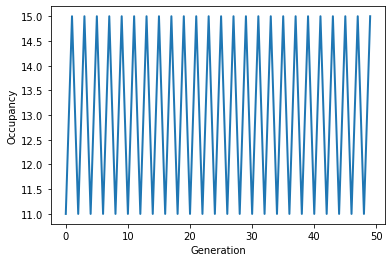

In [43]:
## OCCUPANCY
#Checking for the numbers of cells that are alive at each generation
iterations=[i for i in range(T)]
number_cell_alive = cell_alive

plt.plot(iterations, number_cell_alive, linestyle="-",linewidth=2)
plt.xlabel('Generation')
plt.ylabel('Occupancy')

## Frequency 

How many alive cells there are at every step of the game?

In [44]:
## FREQUENCY
#Calculating how long it takes a pattern to return to its original shape
def frequency2(N, T, grid):
    
    old_grid = grid 
    new_grid = grid.copy()
    t = 1 # Current time level
    freq = 0
    
    while t <= T:
        grid2 = conway_rule(N, grid, new_grid)        
        comparison = grid2 == old_grid
        equal_arrays = comparison.all()
        
        if equal_arrays == True:
            freq = t
            break
        
        grid = grid2.copy()
        t += 1
   
    return freq  

For frequency analysis, we selected an oscilattor pattern.

In [45]:
#Executing again to get the frequency
N = 60
T = 20

grid = create_grid(N, T)
pattern = beacon 

int_grid = initial_patern(grid, pattern, N)

freq2 = frequency2(N, T, int_grid)

print(freq2)

2


## Replication

The average number of cells that change state at each generation.

In [46]:
## REPLICATION
#the average number of cells that change state at each generation

def replication(N, T, grid):
    
    birth_num = np.zeros(T)
    dead_num = np.zeros(T)
    change_cell_num = np.zeros(T)
    
    old_grid = grid
    new_grid = grid.copy()
    
    t = 1 # Current time level
    freq = 0
    
    while t <= T:
    # Loop over each cell of the grid and apply Conway's rules.
        
        grid2 = conway_rule(N, grid, new_grid)
                
        for i in range(N):
            for j in range(N):
                if((grid[i][j] == 0) and (grid2[i][j] == 1)):
                    change_cell_num[t-1] += 1
                    birth_num[t-1] += 1
                    dead_num[t-1] += 0
                elif(grid[i][j] == 1) and (grid2[i][j] == 0):
                    change_cell_num[t-1] += 1
                    birth_num[t-1] += 0
                    dead_num[t-1] += 1
                
        grid = grid2.copy()
        t += 1
    
    return birth_num, dead_num, change_cell_num

In [47]:
N = 100
T = 30

grid = create_grid(N, T)
pattern = diehard

int_grid = initial_patern(grid, pattern, N)

birth, death, change = replication(N, T, grid)

Text(0.5, 1.0, 'Diehard')

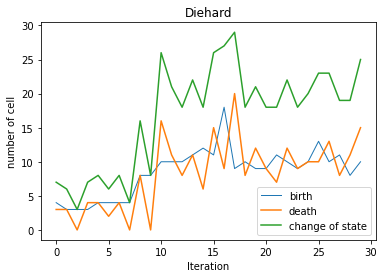

In [48]:
#making a plot to properly see the states of the cells per generation
iteration=[i for i in range(T)]

fig,ax = plt.subplots()
plt.plot(iteration,birth,label="birth",linestyle="-",linewidth=1)
plt.plot(iteration,death,label="death",linestyle="-")
plt.plot(iteration,change,label="change of state")
plt.xlabel('Iteration')
plt.ylabel('number of cell')
plt.legend()
plt.title("Diehard")

Using a heatmap to see the behaviour of the cells

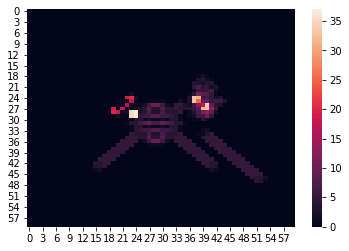

In [23]:
##HEAT
ax = sns.heatmap(heat_grid)
plt.show()

## Speed

How much squares it moves before it re-assembles? For this analysis part we can select Spaceships.

In [49]:
N = 100
T = 40

def find_alive(N, T,grid):
    found=False
    posx=0
    posy=0
    for i in range(N):
        for j in range(N):
            if(grid[i][j] == 1 and found==False):
                posx,posy =i,j
                found=True
    return posx,posy

In [63]:
def speed(N, T, grid):
    grid_list=grid.copy()
    new_grid = grid.copy()

    t = 1 # Current time level
    
    while t <= T:
        grid2 = conway_rule(N, grid, new_grid)        
        grid = grid2.copy()        
        t += 1 
    return grid

In [36]:
## SPEED 
#(how much squares it moves before it re assembles)

N = 100
T = 40

grid = create_grid(N, T)
pattern = glider

int_grid = initial_patern(grid, pattern, N)

orgx,orgy =find_alive(N,T,int_grid)
list_grid=speed(N,T,grid)
updx,updy =find_alive(N,T,list_grid)

speedx=abs(orgx - updx)
speedy=abs(orgy-updy)

print("the pattern speed horizontally is" ,speedx)
print("the pattern speed vertically is",speedy)


the pattern speed horizontally is 48
the pattern speed vertically is 49


## Let's increase the size of the GoF's world and play with more advanced and complex     patterns and analyze them

### Block Switch Engine

the number of alive cells in the generation 0 is : 10

At time level 1
the number of alive cells in the generation 1 is : 14

At time level 2
the number of alive cells in the generation 2 is : 13

At time level 3
the number of alive cells in the generation 3 is : 19

At time level 4
the number of alive cells in the generation 4 is : 16

At time level 5
the number of alive cells in the generation 5 is : 21

At time level 6
the number of alive cells in the generation 6 is : 20

At time level 7
the number of alive cells in the generation 7 is : 26

At time level 8
the number of alive cells in the generation 8 is : 24

At time level 9
the number of alive cells in the generation 9 is : 28

At time level 10
the number of alive cells in the generation 10 is : 30

At time level 11
the number of alive cells in the generation 11 is : 26

At time level 12
the number of alive cells in the generation 12 is : 34

At time level 13
the number of alive cells in the generation 13 is : 32

At time level 

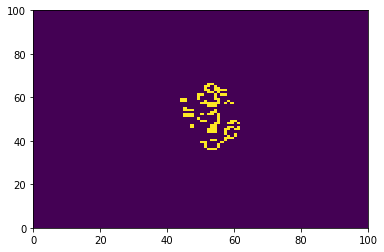

In [109]:
N = 100  # Size of the game
T = 90  # Number of the iterations

grid = create_grid(N, T) #First create an empty board
pattern = block_switch_engine #Second, Select your initial pattern

int_grid = initial_patern(grid, pattern, N) #place your initial pattern at the middle of the board.

cell_alive,heat_grid = Game_Of_Life(N,T, int_grid)

# png to GIF file
from PIL import Image
# Create the frames
frames = []
imgs = glob.glob("*.png")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
 
#save into a GIF file that loops forever
frames[0].save('png_to_gif2.gif', format='GIF',
               append_images=frames[0:],
               save_all=True,
               duration=300, loop=0)


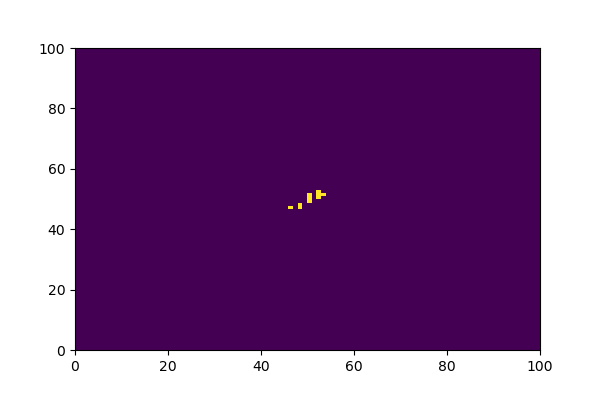

In [110]:
from IPython.display import Image

Image("generation0.png")

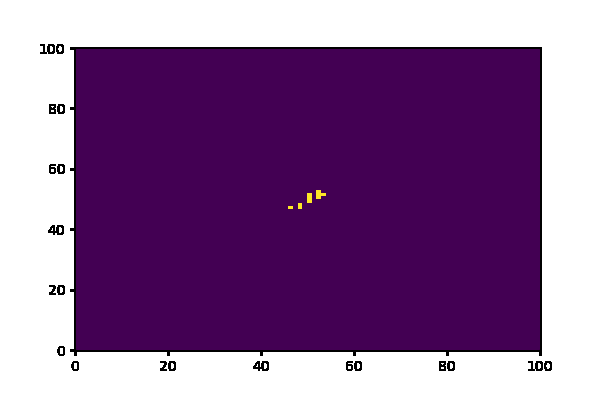

In [111]:
from IPython.display import Image

Image("png_to_gif2.gif")

Text(0, 0.5, 'Occupancy')

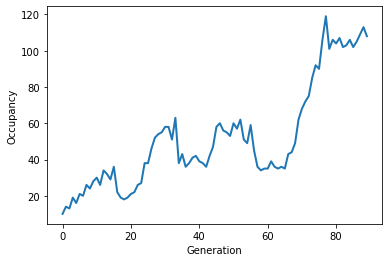

In [58]:
iterations=[i for i in range(T)]
number_cell_alive = cell_alive

plt.plot(iterations, number_cell_alive, linestyle="-",linewidth=2)
plt.xlabel('Generation')
plt.ylabel('Occupancy')

In [59]:
freq2 = frequency2(N, T, int_grid)

print(freq2)

0


Text(0.5, 1.0, 'Block Switch Engine')

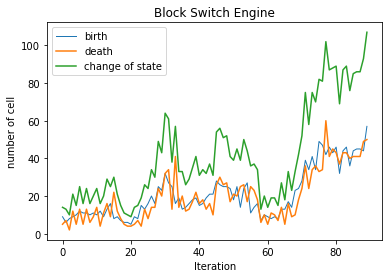

In [61]:
birth, death, change = replication(N, T, grid)

#making a plot to properly see the states of the cells per generation
iteration=[i for i in range(T)]

fig,ax = plt.subplots()
plt.plot(iteration,birth,label="birth",linestyle="-",linewidth=1)
plt.plot(iteration,death,label="death",linestyle="-")
plt.plot(iteration,change,label="change of state")
plt.xlabel('Iteration')
plt.ylabel('number of cell')
plt.legend()
plt.title("Block Switch Engine")

In [ ]:
##HEAT
#Using a heatmap to see the behaviour of the cells
ax = sns.heatmap(heat_grid)
plt.show()

In [64]:
orgx,orgy = find_alive(N,T,int_grid)
list_grid = speed(N,T,grid)
updx,updy = find_alive(N,T,list_grid)

speedx = abs(orgx - updx)
speedy = abs(orgy-updy)

print("the pattern speed horizontally is" ,speedx)
print("the pattern speed vertically is",speedy)

the pattern speed horizontally is 14
the pattern speed vertically is 0


### Gosper Glider Gun

the number of alive cells in the generation 0 is : 35

At time level 1
the number of alive cells in the generation 1 is : 42

At time level 2
the number of alive cells in the generation 2 is : 45

At time level 3
the number of alive cells in the generation 3 is : 55

At time level 4
the number of alive cells in the generation 4 is : 57

At time level 5
the number of alive cells in the generation 5 is : 50

At time level 6
the number of alive cells in the generation 6 is : 54

At time level 7
the number of alive cells in the generation 7 is : 52

At time level 8
the number of alive cells in the generation 8 is : 60

At time level 9
the number of alive cells in the generation 9 is : 48

At time level 10
the number of alive cells in the generation 10 is : 63

At time level 11
the number of alive cells in the generation 11 is : 64

At time level 12
the number of alive cells in the generation 12 is : 60

At time level 13
the number of alive cells in the generation 13 is : 57

At time level 

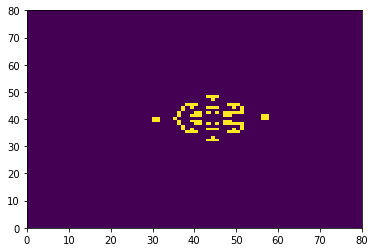

In [112]:
N = 80  # Size of the game
T = 90  # Number of the iterations

grid = create_grid(N, T) #First create an empty board
pattern = glider_gun #Second, Select your initial pattern

int_grid = initial_patern(grid, pattern, N) #place your initial pattern at the middle of the board.

cell_alive,heat_grid = Game_Of_Life(N,T, int_grid)

# png to GIF file
from PIL import Image
# Create the frames
frames = []
imgs = glob.glob("*.png")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
 
#save into a GIF file that loops forever
frames[0].save('png_to_gif2.gif', format='GIF',
               append_images=frames[0:],
               save_all=True,
               duration=300, loop=0)

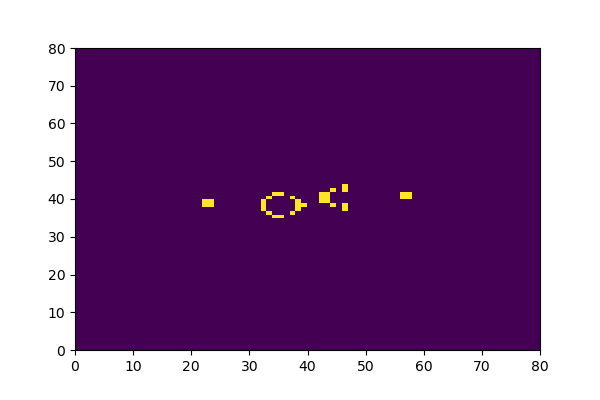

In [113]:
from IPython.display import Image
Image("generation0.png")

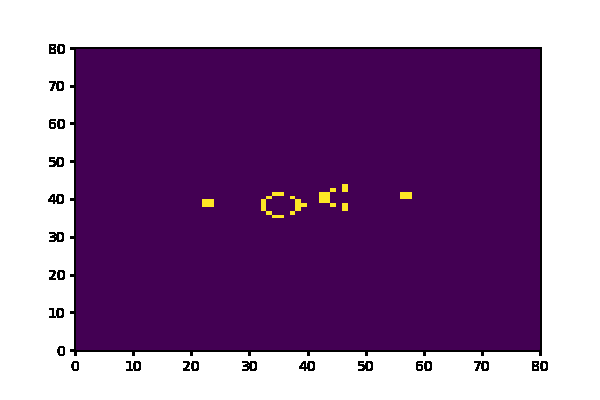

In [115]:
from IPython.display import Image
Image("png_to_gif2.gif")

Text(0, 0.5, 'Occupancy')

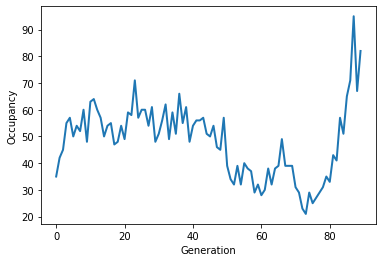

In [116]:
iterations=[i for i in range(T)]
number_cell_alive = cell_alive

plt.plot(iterations, number_cell_alive, linestyle="-",linewidth=2)
plt.xlabel('Generation')
plt.ylabel('Occupancy')

In [117]:
freq2 = frequency2(N, T, int_grid)

print(freq2)

0


Text(0.5, 1.0, 'Gosper Glider Gun')

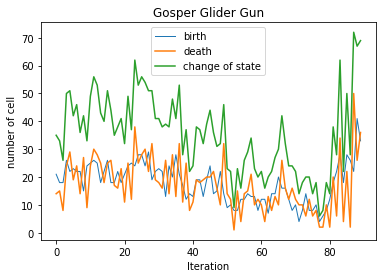

In [118]:
birth, death, change = replication(N, T, grid)

#making a plot to properly see the states of the cells per generation
iteration=[i for i in range(T)]

fig,ax = plt.subplots()
plt.plot(iteration,birth,label="birth",linestyle="-",linewidth=1)
plt.plot(iteration,death,label="death",linestyle="-")
plt.plot(iteration,change,label="change of state")
plt.xlabel('Iteration')
plt.ylabel('number of cell')
plt.legend()
plt.title("Gosper Glider Gun")

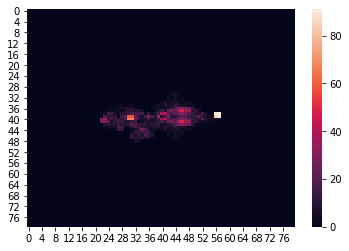

In [119]:
##HEAT
#Using a heatmap to see the behaviour of the cells
ax = sns.heatmap(heat_grid)
plt.show()

In [120]:
orgx,orgy =find_alive(N,T,int_grid)
list_grid=speed(N,T,grid)
updx,updy =find_alive(N,T,list_grid)

speedx=orgx - updx
speedy=orgy-updy

print("the pattern speed horizontally is" ,speedx)
print("the pattern speed vertically is",speedy)

the pattern speed horizontally is 5
the pattern speed vertically is 3


### Heavy Weight Spaceship

the number of alive cells in the generation 0 is : 13

At time level 1
the number of alive cells in the generation 1 is : 18

At time level 2
the number of alive cells in the generation 2 is : 13

At time level 3
the number of alive cells in the generation 3 is : 18

At time level 4
the number of alive cells in the generation 4 is : 13

At time level 5
the number of alive cells in the generation 5 is : 18

At time level 6
the number of alive cells in the generation 6 is : 13

At time level 7
the number of alive cells in the generation 7 is : 18

At time level 8
the number of alive cells in the generation 8 is : 13

At time level 9
the number of alive cells in the generation 9 is : 18

At time level 10
the number of alive cells in the generation 10 is : 13

At time level 11
the number of alive cells in the generation 11 is : 18

At time level 12
the number of alive cells in the generation 12 is : 13

At time level 13
the number of alive cells in the generation 13 is : 18

At time level 

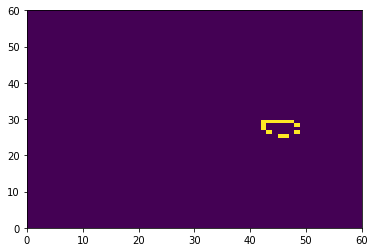

In [121]:
N = 60  # Size of the game
T = 90  # Number of the iterations

grid = create_grid(N, T) #First create an empty board
pattern = heavy_weight_spaceship #Second, Select your initial pattern

int_grid = initial_patern(grid, pattern, N) #place your initial pattern at the middle of the board.

cell_alive,heat_grid = Game_Of_Life(N,T, int_grid)

# png to GIF file
from PIL import Image
# Create the frames
frames = []
imgs = glob.glob("*.png")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
 
#save into a GIF file that loops forever
frames[0].save('png_to_gif2.gif', format='GIF',
               append_images=frames[0:],
               save_all=True,
               duration=300, loop=0)

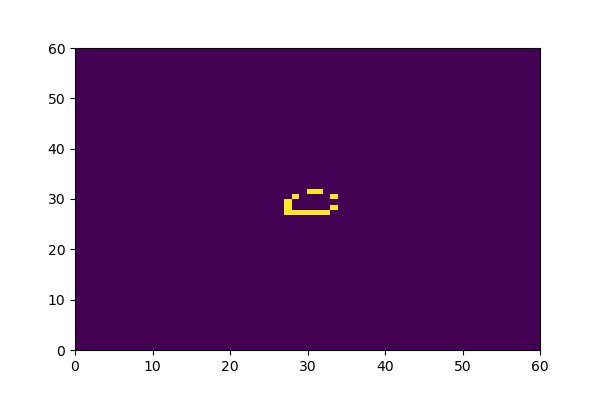

In [83]:
from IPython.display import Image
Image("generation0.png")

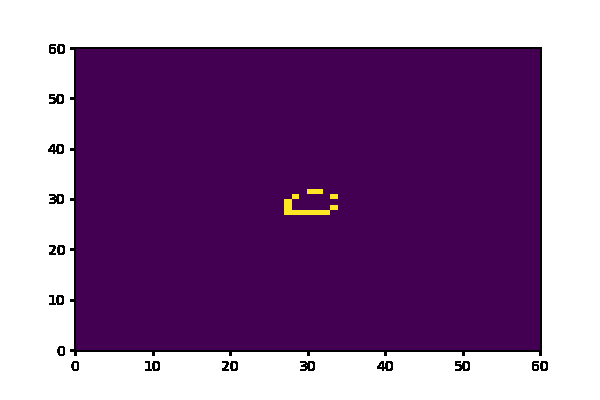

In [84]:
from IPython.display import Image
Image("png_to_gif2.gif")

Text(0, 0.5, 'Occupancy')

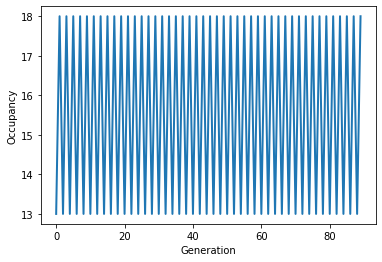

In [122]:
iterations=[i for i in range(T)]
number_cell_alive = cell_alive

plt.plot(iterations, number_cell_alive, linestyle="-",linewidth=2)
plt.xlabel('Generation')
plt.ylabel('Occupancy')

In [123]:
freq2 = frequency2(N, T, int_grid)

print(freq2)

0


Text(0.5, 1.0, 'Heavy Weight Spaceship')

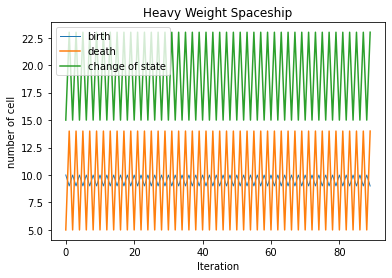

In [124]:
birth, death, change = replication(N, T, grid)

#making a plot to properly see the states of the cells per generation
iteration=[i for i in range(T)]

fig,ax = plt.subplots()
plt.plot(iteration,birth,label="birth",linestyle="-",linewidth=1)
plt.plot(iteration,death,label="death",linestyle="-")
plt.plot(iteration,change,label="change of state")
plt.xlabel('Iteration')
plt.ylabel('number of cell')
plt.legend()
plt.title("Heavy Weight Spaceship")

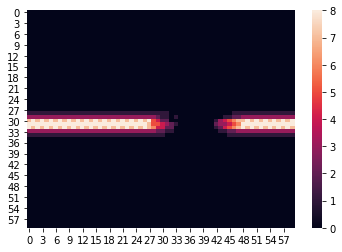

In [125]:
##HEAT
#Using a heatmap to see the behaviour of the cells
ax = sns.heatmap(heat_grid)
plt.show()

In [126]:
orgx,orgy =find_alive(N,T,int_grid)
list_grid=speed(N,T,grid)
updx,updy =find_alive(N,T,list_grid)

speedx = abs(orgx - updx)
speedy = abs(orgy-updy)

print("the pattern speed horizontally is" ,speedx)
print("the pattern speed vertically is",speedy)

the pattern speed horizontally is 2
the pattern speed vertically is 12


### Pulsar

the number of alive cells in the generation 0 is : 48

At time level 1
the number of alive cells in the generation 1 is : 56

At time level 2
the number of alive cells in the generation 2 is : 72

At time level 3
the number of alive cells in the generation 3 is : 48

At time level 4
the number of alive cells in the generation 4 is : 56

At time level 5
the number of alive cells in the generation 5 is : 72

At time level 6
the number of alive cells in the generation 6 is : 48

At time level 7
the number of alive cells in the generation 7 is : 56

At time level 8
the number of alive cells in the generation 8 is : 72

At time level 9
the number of alive cells in the generation 9 is : 48

At time level 10
the number of alive cells in the generation 10 is : 56

At time level 11
the number of alive cells in the generation 11 is : 72

At time level 12
the number of alive cells in the generation 12 is : 48

At time level 13
the number of alive cells in the generation 13 is : 56

At time level 

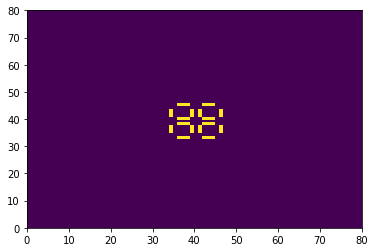

In [127]:
N = 80  # Size of the game
T = 90  # Number of the iterations

grid = create_grid(N, T) #First create an empty board
pattern = pulsar #Second, Select your initial pattern

int_grid = initial_patern(grid, pattern, N) #place your initial pattern at the middle of the board.

cell_alive,heat_grid = Game_Of_Life(N,T, int_grid)

# png to GIF file
from PIL import Image
# Create the frames
frames = []
imgs = glob.glob("*.png")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
 
#save into a GIF file that loops forever
frames[0].save('png_to_gif2.gif', format='GIF',
               append_images=frames[0:],
               save_all=True,
               duration=300, loop=0)

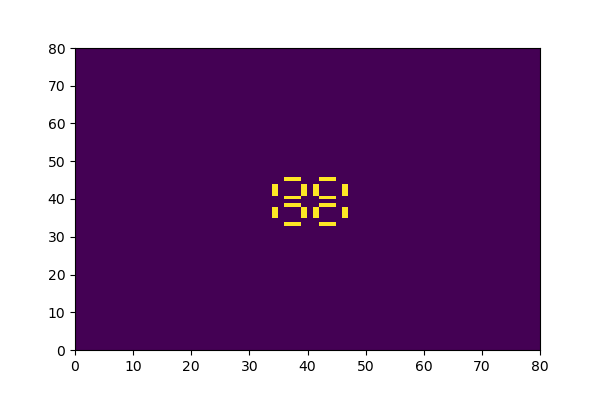

In [128]:
from IPython.display import Image
Image("generation0.png")

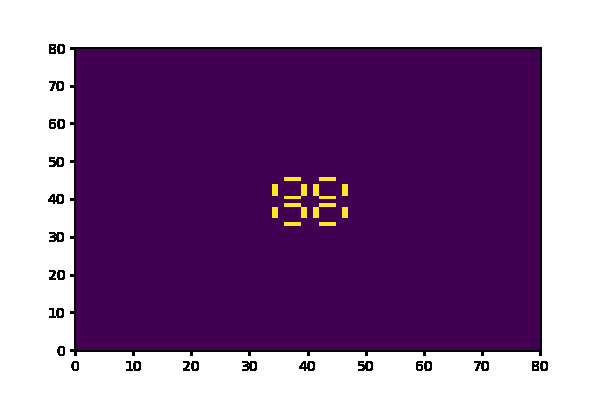

In [129]:
from IPython.display import Image
Image("png_to_gif2.gif")

Text(0, 0.5, 'Occupancy')

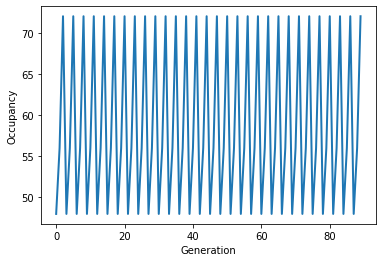

In [130]:
iterations=[i for i in range(T)]
number_cell_alive = cell_alive

plt.plot(iterations, number_cell_alive, linestyle="-",linewidth=2)
plt.xlabel('Generation')
plt.ylabel('Occupancy')

In [131]:
freq2 = frequency2(N, T, int_grid)

print(freq2)

3


Text(0.5, 1.0, 'Pulsar')

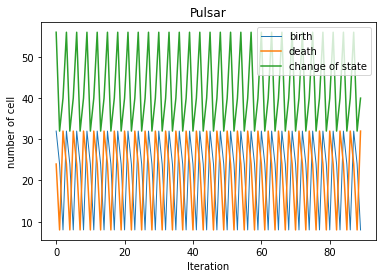

In [132]:
birth, death, change = replication(N, T, grid)

#making a plot to properly see the states of the cells per generation
iteration=[i for i in range(T)]

fig,ax = plt.subplots()
plt.plot(iteration,birth,label="birth",linestyle="-",linewidth=1)
plt.plot(iteration,death,label="death",linestyle="-")
plt.plot(iteration,change,label="change of state")
plt.xlabel('Iteration')
plt.ylabel('number of cell')
plt.legend()
plt.title("Pulsar")

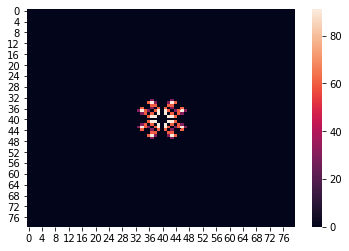

In [133]:
##HEAT
#Using a heatmap to see the behaviour of the cells
ax = sns.heatmap(heat_grid)
plt.show()

In [134]:
orgx,orgy =find_alive(N,T,int_grid)
list_grid=speed(N,T,grid)
updx,updy =find_alive(N,T,list_grid)

speedx=orgx - updx
speedy=orgy-updy

print("the pattern speed horizontally is" ,speedx)
print("the pattern speed vertically is",speedy)

the pattern speed horizontally is 0
the pattern speed vertically is 0


### Combination 

The combination of the some patterns analyzed in this section.

the number of alive cells in the generation 0 is : 57

At time level 1
the number of alive cells in the generation 1 is : 49

At time level 2
the number of alive cells in the generation 2 is : 45

At time level 3
the number of alive cells in the generation 3 is : 41

At time level 4
the number of alive cells in the generation 4 is : 41

At time level 5
the number of alive cells in the generation 5 is : 41

At time level 6
the number of alive cells in the generation 6 is : 49

At time level 7
the number of alive cells in the generation 7 is : 51

At time level 8
the number of alive cells in the generation 8 is : 51

At time level 9
the number of alive cells in the generation 9 is : 55

At time level 10
the number of alive cells in the generation 10 is : 73

At time level 11
the number of alive cells in the generation 11 is : 51

At time level 12
the number of alive cells in the generation 12 is : 65

At time level 13
the number of alive cells in the generation 13 is : 61

At time level 

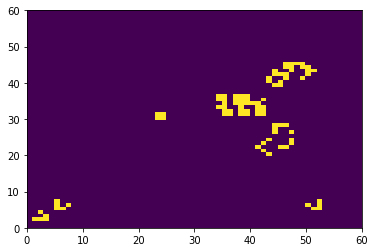

In [136]:
N = 60  # Size of the game
T = 90  # Number of the iterations

grid = create_grid(N, T) #First create an empty board
pattern = combination2 #Second, Select your initial pattern

int_grid = initial_patern(grid, pattern, N) #place your initial pattern at the middle of the board.

cell_alive,heat_grid = Game_Of_Life(N,T, int_grid)

# png to GIF file
from PIL import Image
# Create the frames
frames = []
imgs = glob.glob("*.png")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
 
#save into a GIF file that loops forever
frames[0].save('png_to_gif2.gif', format='GIF',
               append_images=frames[0:],
               save_all=True,
               duration=300, loop=0)

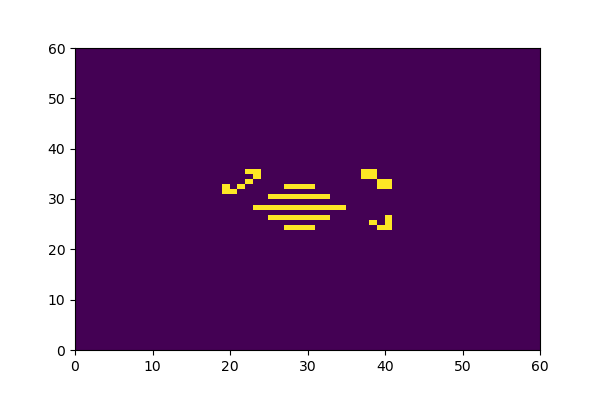

In [137]:
from IPython.display import Image
Image("generation0.png")

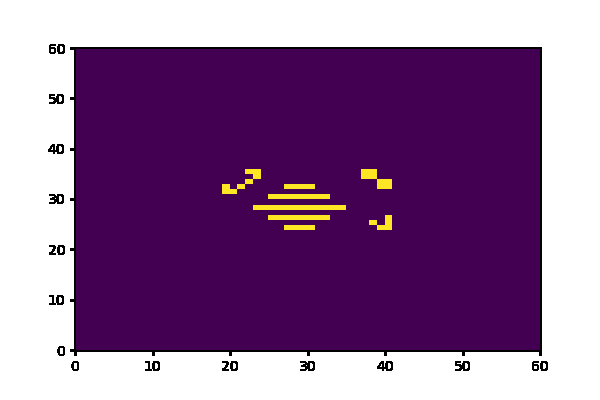

In [103]:
from IPython.display import Image
Image("png_to_gif2.gif")


Text(0, 0.5, 'Occupancy')

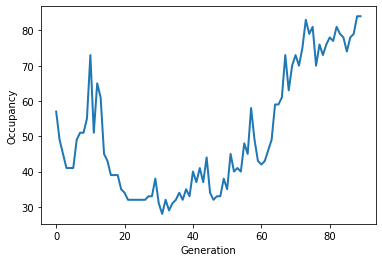

In [138]:
iterations=[i for i in range(T)]
number_cell_alive = cell_alive

plt.plot(iterations, number_cell_alive, linestyle="-",linewidth=2)
plt.xlabel('Generation')
plt.ylabel('Occupancy')

In [139]:
freq2 = frequency2(N, T, int_grid)

print(freq2)

0


Text(0.5, 1.0, 'Combination2')

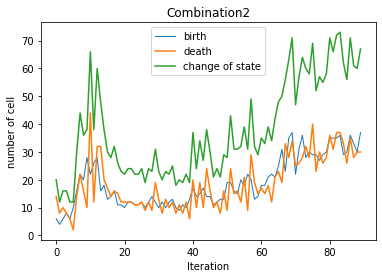

In [140]:
birth, death, change = replication(N, T, grid)

#making a plot to properly see the states of the cells per generation
iteration=[i for i in range(T)]

fig,ax = plt.subplots()
plt.plot(iteration,birth,label="birth",linestyle="-",linewidth=1)
plt.plot(iteration,death,label="death",linestyle="-")
plt.plot(iteration,change,label="change of state")
plt.xlabel('Iteration')
plt.ylabel('number of cell')
plt.legend()
plt.title("Combination2")

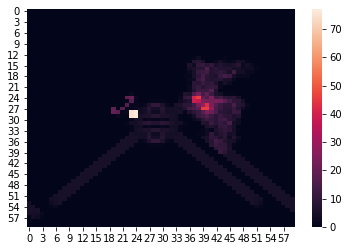

In [141]:
##HEAT
#Using a heatmap to see the behaviour of the cells
ax = sns.heatmap(heat_grid)
plt.show()

In [142]:
orgx,orgy =find_alive(N,T,int_grid)
list_grid=speed(N,T,grid)
updx,updy =find_alive(N,T,list_grid)

speedx=abs(orgx - updx)
speedy=abs(orgy-updy)

print("the pattern speed horizontally is" ,speedx)
print("the pattern speed vertically is",speedy)

the pattern speed horizontally is 10
the pattern speed vertically is 24
